In [1]:
# Import the numpy package under the alias np. 
# Numpy is a library for the Python programming language, adding support for large, 
# multi-dimensional arrays and matrices, along with a large collection of high-level 
# mathematical functions to operate on these arrays.
import numpy as np

# Import the pandas package under the alias pd.
# Pandas is an open source data analysis and manipulation tool, 
# built on top of the Python programming language. It offers data structures and 
# operations for manipulating numerical tables and time series.
import pandas as pd

# Import the pyplot interface from the matplotlib library under the alias plt.
# Matplotlib is a plotting library for the Python programming language and its 
# numerical mathematics extension NumPy. Pyplot is a collection of command style 
# functions that make matplotlib work like MATLAB.
from matplotlib import pyplot as plt

# Read a comma-separated values (csv) file into DataFrame. Here, the file path is given as a raw string (r-string).
# The r-string notation (r'...') ensures that special characters, such as the backslash ('\'), 
# are treated as literal characters and not as escape characters. This line reads the CSV file 
# containing the training data for the digit recognizer dataset into a pandas DataFrame.
# This DataFrame is a 2-dimensional labeled data structure with columns that can be of different types.
data = pd.read_csv(r'C:\Users\seaso\Desktop\Lab5_451\digit-recognizer\train.csv')


In [2]:
# Convert the pandas DataFrame into a NumPy array. This is done because NumPy arrays
# are generally faster and more efficient for numerical operations. They also support a greater variety 
# of numerical operations that can be applied on the entire dataset without the need for explicit loops.
data = np.array(data)

# Retrieve the dimensions of the data array, where 'm' is the number of examples
# and 'n' is the number of features (784 pixel values + 1 label column = 785 columns for the MNIST dataset).
# This is necessary to understand the dataset's structure and to later manipulate it appropriately.
m, n = data.shape

# Shuffle the data in-place along the first axis which is along the rows (examples).
# Shuffling is important before splitting the data into training and development (dev) sets
# to ensure the data is randomly distributed, which helps in training a well-generalized model.
np.random.shuffle(data)

# Split the shuffled data into a development (dev) set. Here, the first 1000 examples are sliced out.
# The 'T' transposes the sliced data making the columns represent the individual examples, and the rows represent the features.
# Transposing is done to align with the convention where each column is an example and each row is a feature.
data_dev = data[0:1000].T

# Extract the first row of the dev set which contains the labels for each example.
# This row provides the correct digit (0-9) that corresponds to each image (example) in the dev set.
Y_dev = data_dev[0]

# Extract the remaining rows of the dev set which contain the pixel values for each image.
# These represent the input features for the neural network, one column per image.
X_dev = data_dev[1:n]

# Normalize the pixel values of the dev set by dividing by 255.
# Since pixel values range from 0 to 255, this step scales the features to a range of [0, 1],
# which can help the neural network learn more efficiently.
X_dev = X_dev / 255.

# Split the remaining shuffled data into a training set using the same approach as the dev set.
# Here, all examples after the first 1000 are used for training.
# The 'T' transposes the data so that, again, columns are examples and rows are features.
data_train = data[1000:m].T

# Extract the first row of the training set, containing the labels for each training example.
Y_train = data_train[0]

# Extract the remaining rows of the training set, containing the pixel values for each training image.
X_train = data_train[1:n]

# Normalize the pixel values of the training set by dividing by 255 to scale to [0, 1].
X_train = X_train / 255.

# Store the number of training examples, which is now the number of columns after the transpose.
# This variable is not used immediately but is often useful to have for computations in neural networks.
_, m_train = X_train.shape


In [3]:
# The variable 'Y_train' now holds the labels for the training data extracted from the data array.
# This line itself is not an operation; it's simply the variable 'Y_train' which was assigned earlier.
# When you run this line in a Python environment (such as Jupyter Notebook), it will output the values stored in 'Y_train'.
# This is typically used for quickly inspecting the variable or for debugging purposes.

# 'Y_train' contains the true classifications for each of the training images. 
# For the MNIST dataset, these will be integers from 0 to 9, corresponding to the digit represented by each 28x28 pixel image.
# This array is one-dimensional, with a length equal to the number of training examples (m - 1000, where m is the total number of images in 'data').
Y_train


array([7, 3, 6, ..., 5, 7, 5], dtype=int64)

In [4]:
# Define a function to initialize the parameters of the neural network.
# This function doesn't take any inputs and returns initialized weights and biases for each layer of the network.
def init_params():
    # Initialize weights for the first hidden layer.
    # 'W1' is a matrix of shape (32, 784) filled with random values between -0.5 and 0.5.
    # These weights connect the input layer (784 nodes, for the flattened 28x28 pixel MNIST images) to the first hidden layer (32 nodes).
    W1 = np.random.rand(64, 784) - 0.5   # First hidden layer with 32 nodes
    
    # Initialize biases for the first hidden layer.
    # 'b1' is a column vector (32, 1) filled with random values between -0.5 and 0.5.
    # Each bias term is added to the weighted sum of inputs to a neuron, affecting the neuron's activation.
    b1 = np.random.rand(64, 1) - 0.5

    # Initialize weights for the second hidden layer.
    # 'W2' connects the first hidden layer (32 nodes) to the second hidden layer (64 nodes) with a shape of (64, 32).
    W2 = np.random.rand(32, 64) - 0.5    # Second hidden layer with 64 nodes

    # Initialize biases for the second hidden layer.
    b2 = np.random.rand(32, 1) - 0.5

    # Initialize weights for the output layer.
    # 'W3' connects the second hidden layer (64 nodes) to the output layer (10 nodes, one for each digit 0-9) with a shape of (10, 64).
    W3 = np.random.rand(10, 32) - 0.5    # Output layer with 10 nodes

    # Initialize biases for the output layer.
    b3 = np.random.rand(10, 1) - 0.5

    # Return the initialized weights and biases.
    # The function returns six items: W1, b1, W2, b2, W3, b3, which are used by the neural network for forward and backward propagation.
    return W1, b1, W2, b2, W3, b3

# Define the ReLU (Rectified Linear Unit) activation function.
# This function takes a single input 'Z', which can be a number, a vector, or a matrix.
def ReLU(Z):
    # The ReLU function returns the input 'Z' where it is positive and zero where 'Z' is negative.
    # It is applied element-wise if 'Z' is a vector or a matrix. This operation introduces non-linearity into the model.
    return np.maximum(Z, 0)

# Define the softmax function, often used in the output layer of a multi-class classification neural network.
# This function takes a single input 'Z', which represents the raw output scores (logits) from the output layer of the neural network.
def softmax(Z):
    # Compute the exponential of each element in the input 'Z' and normalize these values by dividing by the sum of all the exponentials.
    # This ensures that the output values of the softmax function are in the range (0, 1) and sum up to 1, making them interpretable as probabilities.
    A = np.exp(Z) / sum(np.exp(Z))
    # Return the softmax activations. Each element of 'A' represents the probability that the input belongs to a particular class.
    return A


# Define the forward propagation function to compute the neural network's predictions.
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    # Compute the linear part of the first layer's activation. Z1 is the matrix of weighted inputs plus biases for the first layer.
    Z1 = W1.dot(X) + b1
    # Apply the ReLU function element-wise to Z1 to get the first layer's activations (A1). This introduces non-linearity.
    A1 = ReLU(Z1)
    # Repeat the process for the second layer: compute Z2 as the dot product of W2 and A1 plus the bias b2, then apply ReLU.
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    # For the output layer, compute Z3 similarly, then apply the softmax function to obtain A3, which represents the probability distribution over classes.
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    # Return all intermediate and final outputs for use in backpropagation.
    return Z1, A1, Z2, A2, Z3, A3

# Define the derivative of the ReLU function, which is used in backpropagation to compute gradients.
def ReLU_deriv(Z):
    # For ReLU's derivative, return True (or 1) where Z is greater than 0, else False (or 0). This is performed element-wise.
    return Z > 0

# Define a function to convert labels Y into one-hot encoded format.
def one_hot(Y):
    # Create a matrix of zeros with a shape of (number of classes, number of examples), then set the appropriate elements to 1.
    one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
    # For each label in Y, set the corresponding element in one_hot_Y to 1. Transpose to align with the output format.
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    # Return the one-hot encoded labels.
    return one_hot_Y

# Define the backward propagation function to compute gradients for learning.
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y):
    # Convert labels Y into one-hot encoded format for gradient computation.
    one_hot_Y = one_hot(Y)
    # Compute the derivative of the loss with respect to Z3, then compute gradients for W3 and b3.
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)
    # Use the transposed W3 to propagate the gradient back to the second layer, compute the gradient for Z2, then for W2 and b2.
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    # Repeat the gradient propagation back to the first layer and compute gradients for W1 and b1.
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    # Return the gradients for update.
    return dW1, db1, dW2, db2, dW3, db3

# Define a function to update the parameters of the network using the computed gradients.
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    # Update each weight and bias term by subtracting a fraction of the gradient, where the fraction is determined by the learning rate (alpha).
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    # Return the updated parameters.
    return W1, b1, W2, b2, W3, b3


In [5]:
# Define a function to get predictions from the last layer's activations.
def get_predictions(A3):
    # Use np.argmax to find the index of the maximum value in each column of A3.
    # This index corresponds to the predicted class (digit) for each example.
    # The '0' argument to argmax specifies that we want to find the maximum along the first axis (rows),
    # which effectively gives us one prediction per example (column).
    return np.argmax(A3, 0)

# Define a function to calculate the accuracy of predictions against the true labels.
def get_accuracy(predictions, Y):
    # Compare the predictions array to the true labels Y element-wise, resulting in a boolean array.
    # np.sum counts the number of True values (correct predictions). Dividing by Y.size (total number of examples)
    # gives the fraction of correct predictions, i.e., the accuracy.
    return np.sum(predictions == Y) / Y.size

# Define the gradient descent function to optimize the neural network's parameters.
def gradient_descent(X, Y, alpha, iterations):
    # Initialize the weights and biases of the network. This setup creates the starting point
    # for the optimization process, with random weights and biases for each layer.
    W1, b1, W2, b2, W3, b3 = init_params()
    
    # Iterate over the specified number of iterations to perform the gradient descent optimization.
    for i in range(iterations):
        # Perform forward propagation with the current parameters to calculate the network's predictions.
        # This step involves computing the weighted inputs and activations for each layer, ending with the output layer.
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        
        # Perform backward propagation to calculate the gradients of the cost function with respect to
        # the parameters (weights and biases). This step uses the output from forward propagation to determine
        # how the parameters should be adjusted to reduce the cost.
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y)
        
        # Update the parameters using the gradients calculated in the backward propagation step.
        # The learning rate (alpha) controls how much the parameters are adjusted during each update.
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        
        # Every 10 iterations, print the current iteration number and the accuracy of the model on the training data.
        # This provides insight into how the model is improving over time.
        if i % 10 == 0:
            predictions = get_predictions(A3)
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(predictions, Y))
    
    # After completing all iterations, return the optimized parameters.
    # These parameters can then be used for making predictions on new data.
    return W1, b1, W2, b2, W3, b3


In [6]:
# Start the training process of the neural network with specified parameters.
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
Accuracy:  0.14773170731707316
Iteration:  10
Accuracy:  0.4319512195121951
Iteration:  20
Accuracy:  0.566780487804878
Iteration:  30
Accuracy:  0.6419268292682927
Iteration:  40
Accuracy:  0.6906341463414634
Iteration:  50
Accuracy:  0.7224878048780488
Iteration:  60
Accuracy:  0.7455121951219512
Iteration:  70
Accuracy:  0.7639512195121951
Iteration:  80
Accuracy:  0.779390243902439
Iteration:  90
Accuracy:  0.7914390243902439
Iteration:  100
Accuracy:  0.8023902439024391
Iteration:  110
Accuracy:  0.8111463414634147
Iteration:  120
Accuracy:  0.8188048780487804
Iteration:  130
Accuracy:  0.8254634146341463
Iteration:  140
Accuracy:  0.8311463414634146
Iteration:  150
Accuracy:  0.8361463414634146
Iteration:  160
Accuracy:  0.8411951219512195
Iteration:  170
Accuracy:  0.8455853658536585
Iteration:  180
Accuracy:  0.8495121951219512
Iteration:  190
Accuracy:  0.8528536585365853
Iteration:  200
Accuracy:  0.8568048780487805
Iteration:  210
Accuracy:  0.8598536585365854


In [7]:
# Define a function to make predictions using the trained neural network parameters for any input data X.
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    # Perform forward propagation with the current parameters (weights and biases) and the input data X.
    # This will compute the network's output activations for each layer, but here we're only interested in the final output (A3).
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    
    # Use the get_predictions function to interpret the final layer's activations (A3) as class predictions.
    # This step converts the output probabilities into a single prediction per example based on the highest probability.
    predictions = get_predictions(A3)
    
    # Return the predictions array, which contains the predicted class (digit) for each input example in X.
    return predictions

# Define a function to test the prediction of the neural network on a single example from the training set.
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    # Extract the specific example from the training set using the provided index. 
    # 'None' is used to maintain the example's shape as a 2D array suitable for matrix operations.
    current_image = X_train[:, index, None]
    
    # Use the make_predictions function to get the neural network's prediction for the extracted example.
    prediction = make_predictions(current_image, W1, b1, W2, b2, W3, b3)
    
    # Retrieve the actual label for the current example from the training labels.
    label = Y_train[index]
    
    # Print the neural network's prediction and the true label to compare.
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    # Reshape the current image's pixel values (which were normalized) back to a 28x28 array for visualization,
    # and multiply by 255 to revert the normalization so the image can be displayed correctly.
    current_image = current_image.reshape((28, 28)) * 255
    
    # Set the colormap to grayscale since MNIST images are grayscale.
    plt.gray()
    
    # Display the image using matplotlib's imshow function, with 'nearest' interpolation for clarity.
    plt.imshow(current_image, interpolation='nearest')
    
    # Show the plot. This displays the image of the digit along with the prediction and actual label printed above.
    plt.show()


Prediction:  [7]
Label:  7


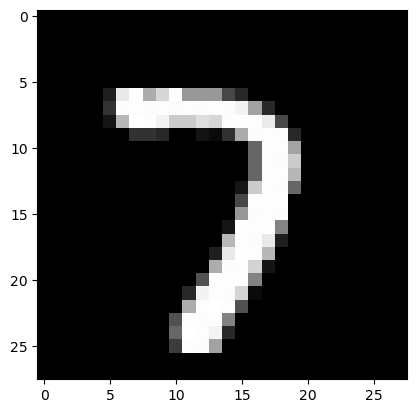

Prediction:  [3]
Label:  3


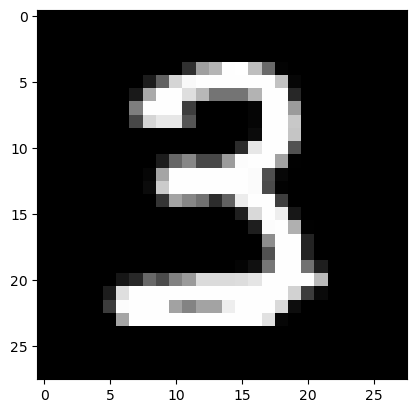

Prediction:  [6]
Label:  6


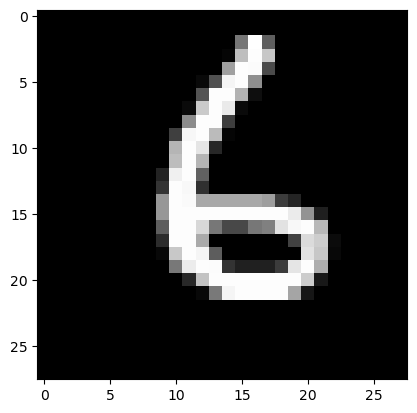

Prediction:  [9]
Label:  9


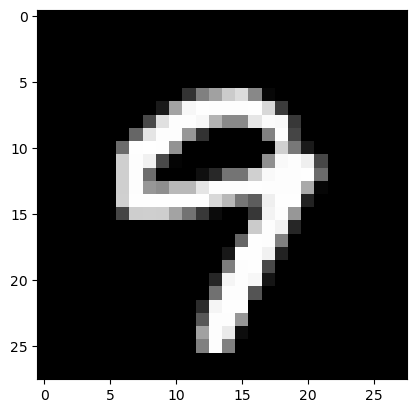

Prediction:  [3]
Label:  3


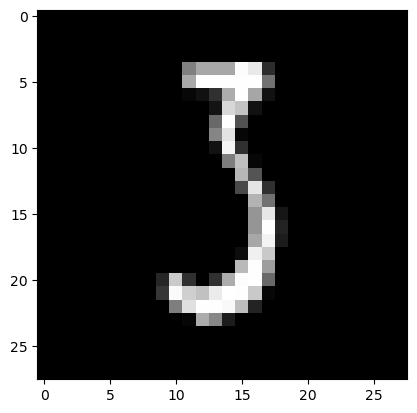

Prediction:  [0]
Label:  6


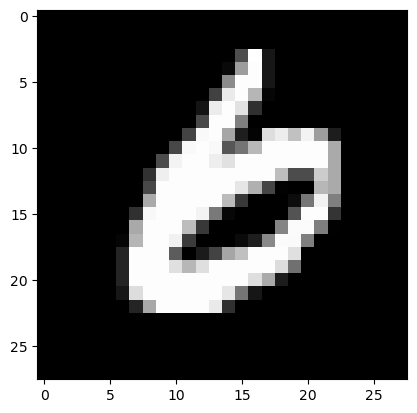

Prediction:  [4]
Label:  4


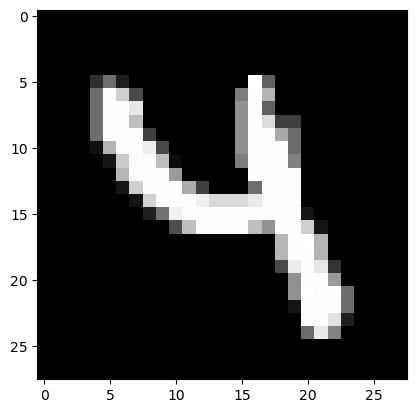

Prediction:  [5]
Label:  5


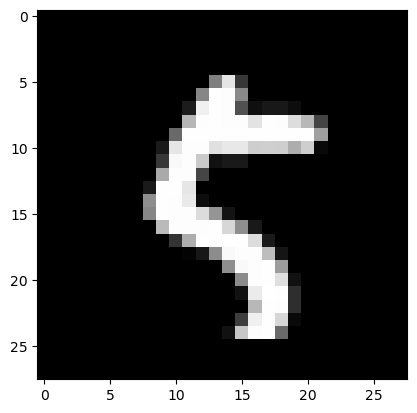

Prediction:  [4]
Label:  4


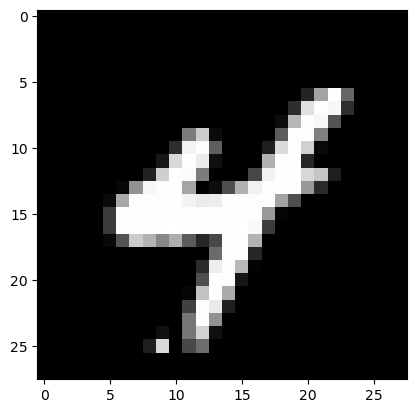

In [8]:
# Loop over the first nine examples in the training dataset.
for i in range(9):
    # Call the test_prediction function for each example.
    # This function takes the index of the example (i), and the trained weights and biases of the neural network.
    # It performs a forward pass using the specific example, computes the neural network's prediction, and prints it.
    # It also prints the actual label (the true digit) for the example to compare against the prediction.
    # Finally, it visualizes the example as an image, showing what the digit looks like.
    # This provides a comprehensive view of the model's predictions vs. the actual labels on individual examples,
    # allowing for a quick visual assessment of the model's performance on these specific cases.
    test_prediction(i, W1, b1, W2, b2, W3, b3)


In [9]:
# Use the make_predictions function to predict the digits for all images in the development set (X_dev).
# The function takes the development set images (X_dev) along with the optimized weights and biases of the neural network
# and computes the predicted class for each image based on the learned features during training.
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)

# Calculate the accuracy of these predictions by comparing them to the true labels (Y_dev) of the development set.
# The get_accuracy function compares the predicted classes to the actual classes, returning the proportion of examples
# for which the predicted class matches the true class. This provides a measure of how well the model is performing,
# specifically on data it hasn't seen during training, which is important for evaluating model generalization.
print("Development Set Accuracy: ", get_accuracy(dev_predictions, Y_dev))


Development Set Accuracy:  0.905
